In [4]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv('./data-for-ml/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [7]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Pre-processing

In [8]:
sex = [['M', 'F']]
bp = [['LOW', 'NORMAL', 'HIGH']]
cholestrol = [['HIGH', 'NORMAL']]
drug = [['drugA', 'drugB', 'drugC', 'drugX' , 'drugY']]

In [9]:
encode_sex = ('sex_encoder', OrdinalEncoder(categories = sex), [1]) # Instead of OrdinalEncoder, we need to use One hot encoding
encode_bp = ('bp_encoder', OrdinalEncoder(categories = bp), [2])
encode_cholesterol = ('ch_encoder', OrdinalEncoder(categories=cholestrol), [3])

In [10]:
transformers = [encode_sex, encode_bp, encode_cholesterol]
ct = ColumnTransformer(transformers=transformers, remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
X[0:5]

array([[1.0, 2.0, 0.0, 23, 25.355],
       [0.0, 0.0, 0.0, 47, 13.093],
       [0.0, 0.0, 0.0, 47, 10.113999999999999],
       [1.0, 1.0, 0.0, 28, 7.797999999999999],
       [1.0, 0.0, 0.0, 61, 18.043]], dtype=object)

## Get output column

In [12]:
y = data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [13]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [14]:
X_trainset.shape, y_trainset.shape

((140, 5), (140,))

In [15]:
X_testset.shape, y_testset.shape

((60, 5), (60,))

In [16]:
drugTree = DecisionTreeClassifier(criterion="gini")

In [17]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier()

In [18]:
X_testset

array([[1.0, 1.0, 0.0, 73, 19.221],
       [0.0, 1.0, 1.0, 67, 10.898],
       [1.0, 1.0, 0.0, 69, 10.065],
       [0.0, 1.0, 0.0, 52, 9.894],
       [1.0, 1.0, 0.0, 28, 12.879000000000001],
       [1.0, 0.0, 0.0, 32, 9.712],
       [1.0, 2.0, 1.0, 36, 15.49],
       [1.0, 2.0, 0.0, 37, 13.091],
       [0.0, 2.0, 0.0, 70, 13.967],
       [0.0, 2.0, 1.0, 31, 11.870999999999999],
       [1.0, 1.0, 0.0, 67, 15.890999999999998],
       [1.0, 2.0, 1.0, 38, 11.325999999999999],
       [1.0, 2.0, 1.0, 28, 18.809],
       [0.0, 2.0, 0.0, 58, 18.991],
       [1.0, 0.0, 1.0, 34, 12.923],
       [1.0, 0.0, 1.0, 41, 18.739],
       [0.0, 0.0, 1.0, 36, 11.424000000000001],
       [1.0, 1.0, 0.0, 28, 7.797999999999999],
       [1.0, 2.0, 1.0, 58, 14.239],
       [0.0, 1.0, 1.0, 60, 10.091000000000001],
       [1.0, 1.0, 0.0, 50, 12.703],
       [0.0, 2.0, 1.0, 74, 15.436],
       [0.0, 0.0, 0.0, 43, 15.376],
       [1.0, 1.0, 0.0, 49, 16.275],
       [1.0, 0.0, 1.0, 20, 11.686],
       [1.0, 2.0, 1.

In [20]:
predTree = drugTree.predict(X_testset)

In [21]:
predTree

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [22]:
y_testset

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
179    drugY
83     drugA
25     drugY
190    drugY
159    drugX
173    drugY
95     drugX
3      drugX
41     drugB
58     drugX
14     drugX
143    drugY
12     drugY
6      drugY
182    drugX
161    drugB
128    drugY
122    drugY
101    drugA
86     drugX
64     drugB
47     drugC
158    drugC
34     drugX
38     drugX
196    drugC
4      drugY
72     drugX
67     drugX
145    drugX
156    drugA
115    drugY
155    drugC
15     drugY
61     drugA
175    drugY
120    drugY
130    drugY
23     drugY
153    drugX
31     drugB
103    drugX
89     drugY
132    drugX
109    drugY
126    drugY
17     drugA
30     drugX
178    drugY
162    drugX
Name: Drug, dtype: object

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [19]:
from sklearn.metrics import confusion_matrix
y_pred = drugTree.predict(X_testset)
pl = confusion_matrix(y_testset,y_pred)

<AxesSubplot:>

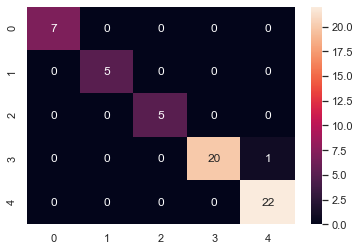

In [20]:
sns.heatmap(pl, annot=True, fmt='g')

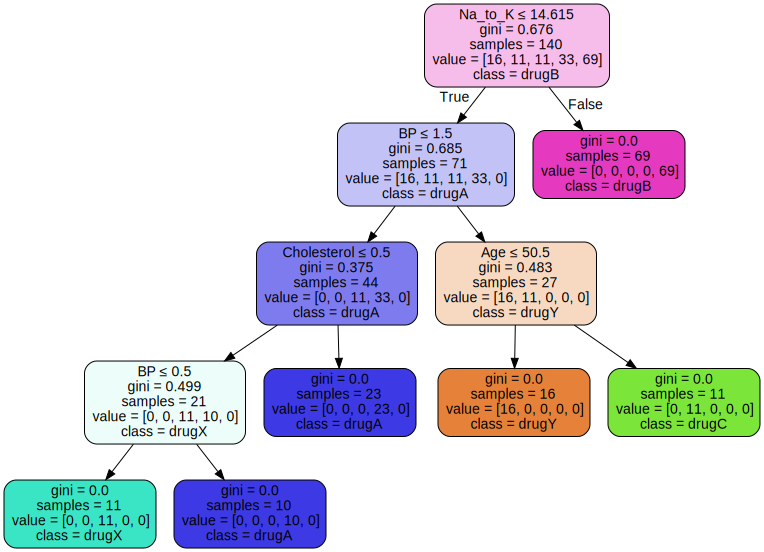

In [24]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(drugTree,
                           filled=True, 
                           rounded=True,
                           class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],
                           feature_names=['Sex', 'BP','Cholesterol','Age','Na_to_K'],
                           special_characters=True,
                           out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Decison Tree")
graph